It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv("dataset\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [4]:
data[data['Class'] == 0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [5]:
data[data['Class'] == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

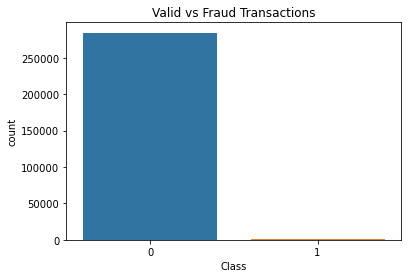

In [6]:
sns.countplot(data=data, x="Class").set(title="Valid vs Fraud Transactions");

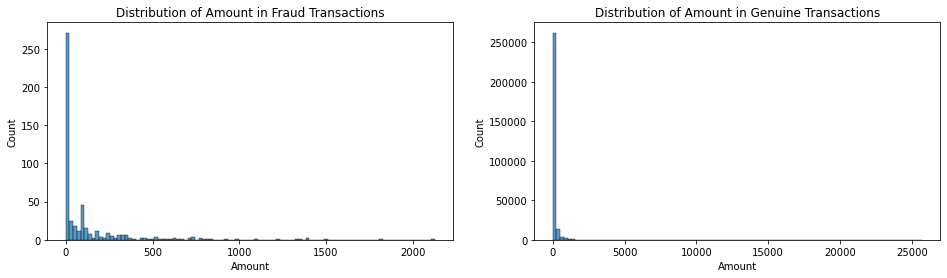

In [7]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.histplot(data[data['Class']==1]['Amount'], bins=100, ax=axs[0]).set(title="Distribution of Amount in Fraud Transactions")
sns.histplot(data[data['Class']==0]['Amount'], bins=100, ax=axs[1]).set(title="Distribution of Amount in Genuine Transactions")
plt.show()

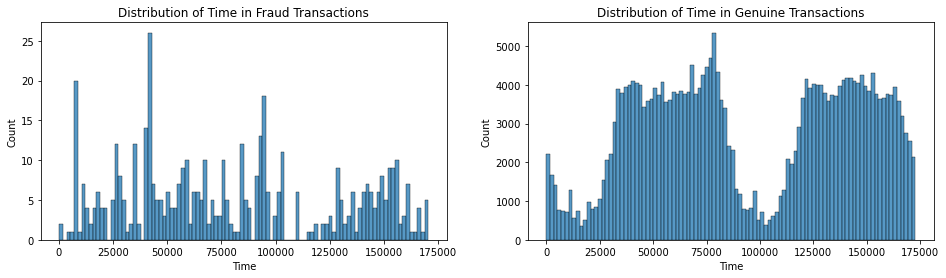

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))
sns.histplot(data[(data['Class'] == 1)]['Time'], bins=100, ax=axs[0]).set(title="Distribution of Time in Fraud Transactions")
sns.histplot(data[(data['Class'] == 0)]['Time'], bins=100, ax=axs[1]).set(title="Distribution of Time in Genuine Transactions")
plt.show()

The above dataset was very skewed, so lets balance the dataset by considering only 500 entries of non-fraud transaction.

In [9]:
fraud = data[data.Class==1]
nonfraud = data[data.Class==0][:500]
balanced_df = pd.concat([fraud, nonfraud])
balanced_df= balanced_df.sample(frac=1, random_state=101)
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9487,14073.0,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1.00,1
352,259.0,-0.363608,1.104008,1.300678,0.070314,0.075180,-1.010396,0.683396,-0.073378,-0.401866,...,-0.261158,-0.685436,-0.013662,0.336313,-0.157577,0.071699,0.245539,0.099037,0.99,0
227,152.0,0.095490,-2.557694,-1.134055,-0.435770,0.728493,4.090476,-0.429329,0.896879,1.004244,...,0.080098,-1.038538,-0.489645,1.108440,0.072603,0.893183,-0.146017,0.113110,614.87,0
340,250.0,-1.337375,1.109391,1.396223,0.038718,0.520267,-0.259157,0.806329,-0.016192,0.425314,...,-0.200431,-0.116354,-0.398652,-0.034692,0.444578,-0.489118,0.259927,0.065547,5.96,0
221018,142394.0,-3.367770,0.099249,-6.148487,3.401955,0.458307,-1.571630,-1.358708,0.672409,-3.188001,...,0.861308,1.249301,1.850627,-0.117471,1.219815,0.000251,1.036011,0.004367,320.01,1


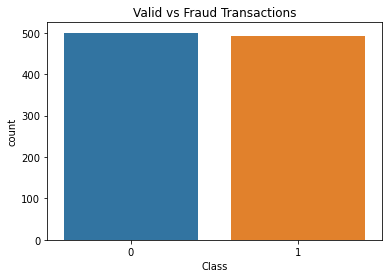

In [10]:
sns.countplot(data=balanced_df, x="Class").set(title="Valid vs Fraud Transactions");

In [11]:
from sklearn.model_selection import train_test_split
x_balanced = balanced_df.drop(['Class'], axis = 1)
y_balanced = balanced_df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x_balanced,y_balanced, test_size = 0.2, random_state = 101) 

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predictions = rfc.predict(x_test)

In [14]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        99

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



### <div style="text-align: right"> Developed by Mr. Ronik Dedhia</div>